In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

iris_klastering = pd.read_csv('D:\\\\BelajarML\\\\dataset\\\\iris.csv', on_bad_lines='skip')
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [75]:
iris_klastering.dropna()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [76]:
iris_klastering[iris_klastering.duplicated()]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [77]:
iris_klastering = iris_klastering.drop_duplicates()

In [78]:
print(iris_klastering.columns)
iris_klastering

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [79]:
iris_klastering = iris_klastering.drop(columns=['Species'])

In [80]:
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [81]:
iris_klastering.isnull().sum()

SepalLength    0
SepalWidth     2
PetalLength    2
PetalWidth     0
dtype: int64

In [82]:
iris_klastering.dropna()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
iris_klastering.describe()

,SepalWidth,PetalLength,PetalWidth
count,145.000000,145.000000,147.000000
mean,3.055862,3.788276,1.208844
std,0.439993,1.757188,0.757874
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.400000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


In [84]:
mms = MinMaxScaler()
iris_klastering.dropna(inplace=True)
mms.fit(iris_klastering)

MinMaxScaler()

In [85]:
iris_klastering['SepalLength'] = pd.to_numeric(iris_klastering['SepalLength'], errors='coerce')
iris_klastering = iris_klastering.dropna()

# Menentukan Nilai K dengan Elbow Method

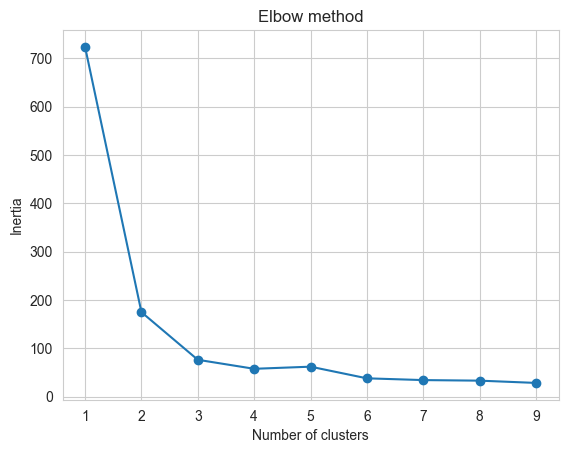

In [99]:
inertia = []
silhouette_avg = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(iris_klastering)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.title('Elbow method')
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Menentukan Nilai K dengan Silhouette Method

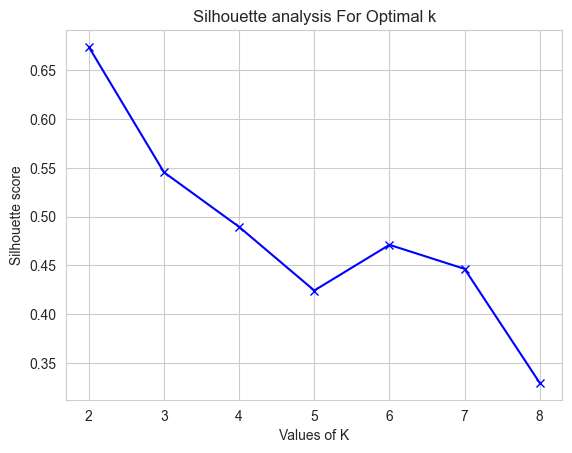

In [87]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    #initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(iris_klastering)
    cluster_labels = kmeans.labels_
    #silhouette score
    silhouette_avg.append(silhouette_score(iris_klastering, cluster_labels))
    
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [88]:
inertia

[639.4635211267606,
 149.55103280141844,
 139.8034784155598,
 55.019173746460105,
 44.31234273504273,
 40.562133333333335,
 37.34421739130435,
 31.680573666529547,
 30.774491582491585]

In [89]:
print(kmeans.cluster_centers_)

[[5.30769231 2.46153846 3.69230769 1.17692308]
 [4.80714286 3.25       1.42142857 0.23571429]
 [6.61666667 3.07916667 5.5625     2.1375    ]
 [6.04375    2.76875    5.025      1.80625   ]
 [5.37058824 3.8        1.51764706 0.27647059]
 [5.88636364 2.78181818 4.3        1.30909091]
 [6.63333333 3.03333333 4.63333333 1.45833333]
 [7.54       3.15       6.39       2.09      ]]


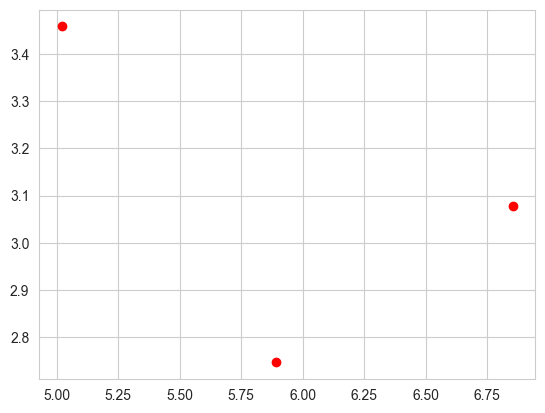

In [90]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_klastering)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red")
plt.show()

# Buat label berdasarkan dengan nilai jumlah klaster

In [91]:
iris_klastering['klabel'] = kmeans.labels_
iris_klastering['klabel']
iris_klastering

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30896\1963762429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_klastering['klabel'] = kmeans.labels_


,SepalLength,SepalWidth,PetalLength,PetalWidth,klabel
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [92]:
print("List of labels", kmeans.labels_)

List of labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2
 2 2 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 1]


# Menentukan titik centroid pada kmeans

In [93]:
print("List of Centroids")
kmeans.cluster_centers_

List of Centroids


array([[5.02      , 3.45777778, 1.45777778, 0.25111111],
       [5.89137931, 2.74655172, 4.3637931 , 1.42413793],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

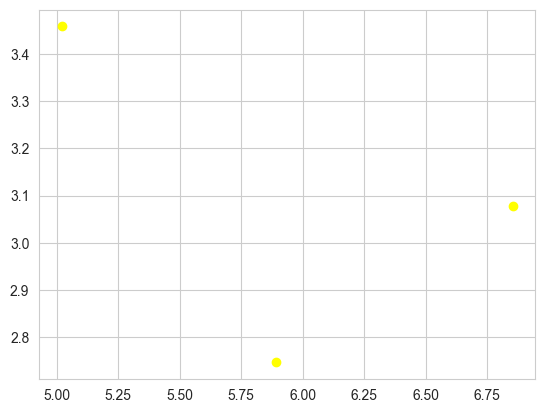

In [94]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="yellow", label="Centroids")

# Visualisasikan hasil klastering ke dalam Scatter Plot [Petal Width , Petal Length]

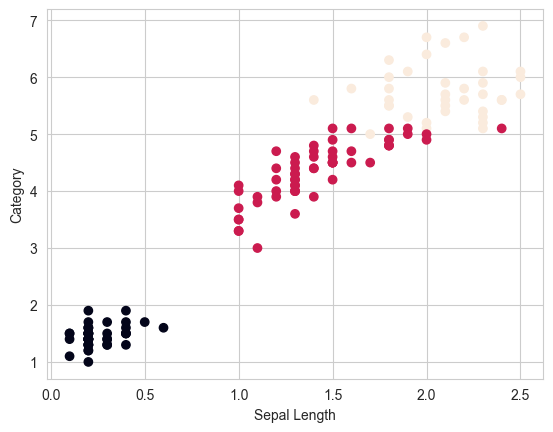

In [95]:
plt.scatter(iris_klastering['PetalWidth'], iris_klastering['PetalLength'], c=kmeans.labels_)
plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()

# Visualisasikan hasil klastering ke dalam Scatter Plot [Petal Length , Sepal Length]

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

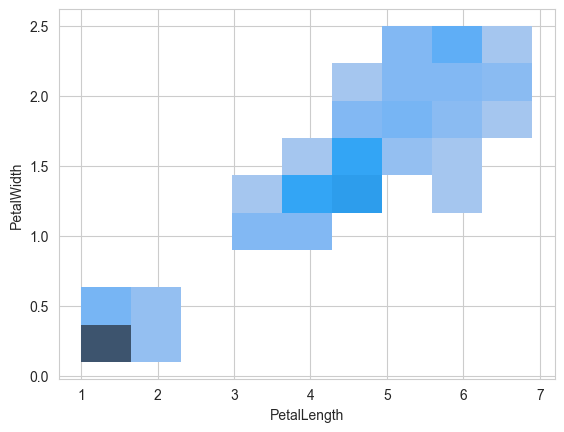

In [96]:
sns.set_style("whitegrid")
sns.histplot(x=iris_klastering['PetalLength'], y=iris_klastering['PetalWidth'])

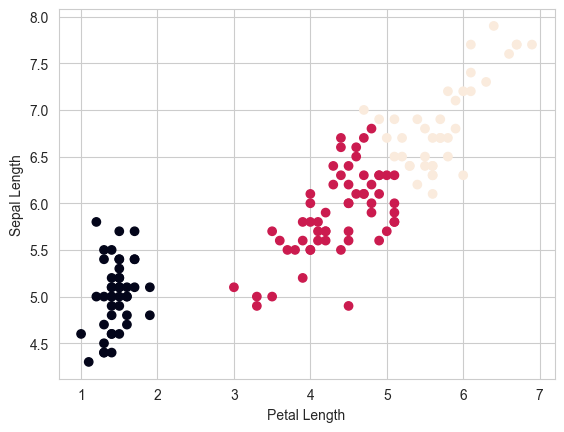

In [97]:
plt.scatter(iris_klastering['PetalLength'], iris_klastering['SepalLength'], c=kmeans.labels_)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.show()

# Visualisasikan hasil klastering ke dalam Scatter Plot [Petal Width , Sepal Length]

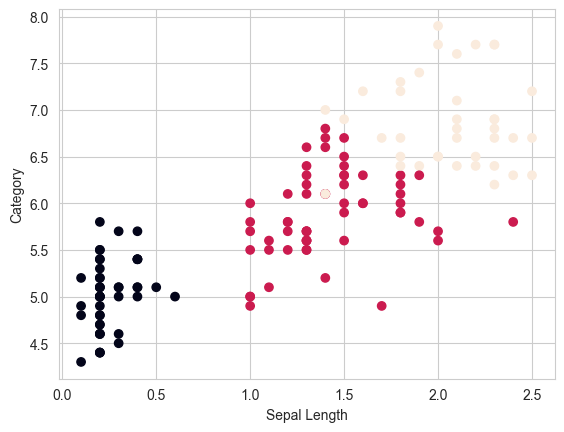

In [98]:
plt.scatter(iris_klastering['PetalWidth'], iris_klastering['SepalLength'], c=kmeans.labels_)
plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()